## Instructions

###### * poi_id.py : Starter code for the POI identifier, you will write your analysis here. You will also submit a version of this file for your evaluator to verify your algorithm and results.  


###### * final_project_dataset.pkl : The dataset for the project, more details below. 


### What to Include

When making your classifier, you will create three pickle files:
* my_dataset.pkl
* my_classifier.pkl
* my_feature_list.pkl

The project evaluator will test these using the _tester.py_ script. You are encouraged to use this script before submitting to gauge if your performance is good enough. 

* You should also include your modified *poi_id.py*

## Process Notes
1. Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?  [relevant rubric items: “data exploration”, “outlier investigation”]  
      <br>
2.  What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values.  [relevant rubric items: “create new features”, “intelligently select features”, “properly scale features”]  
<br>
* What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms?  [relevant rubric item: “pick an algorithm”]  
<br>
* What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  How did you tune the parameters of your particular algorithm? What parameters did you tune? (Some algorithms do not have parameters that you need to tune -- if this is the case for the one you picked, identify and briefly explain how you would have done it for the model that was not your final choice or a different model that does utilize parameter tuning, e.g. a decision tree classifier).  [relevant rubric items: “discuss parameter tuning”, “tune the algorithm”]  
<br>
* What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis?  [relevant rubric items: “discuss validation”, “validation strategy”]  
<br>
* Give at least 2 evaluation metrics and your average performance for each of them.  Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance. [relevant rubric item: “usage of evaluation metrics”]


## References
Web sites, books, forums, blog posts, github repositories etc. 

* “I hereby confirm that this submission is my work. I have cited above the origins of any parts of the submission that were taken from Websites, books, forums, blog posts, github repositories, etc.  
<br>
* code snippets from what we worked on in class 2/10/17

## Setup, and Load Data

In [2]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
import pickle as pkl # to load the data


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # ML models
from sklearn.naive_bayes import GaussianNB  # Gaussian Naive Bayes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC # model
from sklearn.linear_model import LogisticRegression # model 
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split # for creating the test / train datasets
from sklearn.model_selection import GridSearchCV # for selecting the best model params
from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix # for evaluating model performance
from sklearn.pipeline import Pipeline

%matplotlib inline

path = "/Users/brentan/Documents/DAND/Projects/ML/ud120-projects/final_project/BNixon_ML_Submission/"
os.chdir(path)
os.getcwd()
os.listdir()

['my_dataset.pkl',
 'tester.py',
 'BNixon_ML_SubmissionNotes.pdf',
 'final_project_dataset.pkl',
 'BNixon_ML_Resources',
 'BNixon_ML_FinalScript',
 '__pycache__',
 'README',
 'my_classifier.pkl',
 'feature_format.py',
 'my_feature_list.pkl',
 'poi_id.py']

> Set path and import necessary modules

In [109]:
# create open file object
en_pkl = open("/Users/brentan/Documents/DAND/Projects/ML/ud120-projects/final_project/BNixon_ML_Submission_v2/final_project_dataset.pkl", "rb")
# unpickle file
en_data = pkl.load(en_pkl)

> Unpickle enron data

In [110]:
# load unpickled dict into data frame
en_df = pd.DataFrame(en_data)
en_df.head()

,ALLEN PHILLIP K,BADUM JAMES P,BANNANTINE JAMES M,BAXTER JOHN C,BAY FRANKLIN R,BAZELIDES PHILIP J,BECK SALLY W,BELDEN TIMOTHY N,BELFER ROBERT,BERBERIAN DAVID,BERGSIEKER RICHARD P,BHATNAGAR SANJAY,BIBI PHILIPPE A,BLACHMAN JEREMY M,BLAKE JR. NORMAN P,BOWEN JR RAYMOND M,BROWN MICHAEL,BUCHANAN HAROLD G,BUTTS ROBERT H,BUY RICHARD B,CALGER CHRISTOPHER F,CARTER REBECCA C,CAUSEY RICHARD A,CHAN RONNIE,CHRISTODOULOU DIOMEDES,CLINE KENNETH W,COLWELL WESLEY,CORDES WILLIAM R,COX DAVID,CUMBERLAND MICHAEL S,DEFFNER JOSEPH M,DELAINEY DAVID W,DERRICK JR. JAMES V,DETMERING TIMOTHY J,DIETRICH JANET R,DIMICHELE RICHARD G,DODSON KEITH,DONAHUE JR JEFFREY M,DUNCAN JOHN H,DURAN WILLIAM D,ECHOLS JOHN B,ELLIOTT STEVEN,FALLON JAMES B,FASTOW ANDREW S,FITZGERALD JAY L,FOWLER PEGGY,FOY JOE,FREVERT MARK A,FUGH JOHN L,GAHN ROBERT S,GARLAND C KEVIN,GATHMANN WILLIAM D,GIBBS DANA R,GILLIS JOHN,GLISAN JR BEN F,GOLD JOSEPH,GRAMM WENDY L,GRAY RODNEY,HAEDICKE MARK E,HANNON KEVIN P,HAUG DAVID L,HAYES ROBERT E,HAYSLETT RODERICK J,HERMANN ROBERT J,HICKERSON GARY J,HIRKO JOSEPH,HORTON STANLEY C,HUGHES JAMES A,HUMPHREY GENE E,IZZO LAWRENCE L,JACKSON CHARLENE R,JAEDICKE ROBERT,KAMINSKI WINCENTY J,KEAN STEVEN J,KISHKILL JOSEPH G,KITCHEN LOUISE,KOENIG MARK E,KOPPER MICHAEL J,LAVORATO JOHN J,LAY KENNETH L,LEFF DANIEL P,LEMAISTRE CHARLES,LEWIS RICHARD,LINDHOLM TOD A,LOCKHART EUGENE E,LOWRY CHARLES P,MARTIN AMANDA K,MCCARTY DANNY J,MCCLELLAN GEORGE,MCCONNELL MICHAEL S,MCDONALD REBECCA,MCMAHON JEFFREY,MENDELSOHN JOHN,METTS MARK,MEYER JEROME J,MEYER ROCKFORD G,MORAN MICHAEL P,MORDAUNT KRISTINA M,MULLER MARK S,MURRAY JULIA H,NOLES JAMES L,OLSON CINDY K,OVERDYKE JR JERE C,PAI LOU L,PEREIRA PAULO V. FERRAZ,PICKERING MARK R,PIPER GREGORY F,PIRO JIM,POWERS WILLIAM,PRENTICE JAMES,REDMOND BRIAN L,REYNOLDS LAWRENCE,RICE KENNETH D,RIEKER PAULA H,SAVAGE FRANK,SCRIMSHAW MATTHEW,SHANKMAN JEFFREY A,SHAPIRO RICHARD S,SHARP VICTORIA T,SHELBY REX,SHERRICK JEFFREY B,SHERRIFF JOHN R,SKILLING JEFFREY K,STABLER FRANK,SULLIVAN-SHAKLOVITZ COLLEEN,SUNDE MARTIN,TAYLOR MITCHELL S,THE TRAVEL AGENCY IN THE PARK,THORN TERENCE H,TILNEY ELIZABETH A,TOTAL,UMANOFF ADAM S,URQUHART JOHN A,WAKEHAM JOHN,WALLS JR ROBERT H,WALTERS GARETH W,WASAFF GEORGE,WESTFAHL RICHARD K,WHALEY DAVID A,WHALLEY LAWRENCE G,WHITE JR THOMAS E,WINOKUR JR. HERBERT S,WODRASKA JOHN,WROBEL BRUCE,YEAGER F SCOTT,YEAP SOON
bonus,4175000,NaN,NaN,1200000,400000,NaN,700000,5249999,NaN,NaN,250000,NaN,1000000,850000,NaN,1350000,NaN,500000,750000,900000,1250000,300000,1000000,NaN,NaN,NaN,1200000,NaN,800000,325000,600000,3000000,800000,425000,600000,1000000,70000,800000,NaN,750000,200000,350000,2500000,1300000,350000,NaN,NaN,2000000,NaN,509870,850000,NaN,NaN,NaN,600000,750000,NaN,NaN,1150000,1500000,NaN,NaN,NaN,700000,1700000,NaN,NaN,NaN,NaN,NaN,250000,NaN,400000,1000000,NaN,3100000,700000,800000,8000000,7000000,1000000,NaN,NaN,200000,NaN,NaN,NaN,NaN,900000,1100000,NaN,2600000,NaN,600000,NaN,NaN,NaN,325000,1100000,400000,NaN,750000,NaN,1000000,NaN,300000,400000,NaN,NaN,NaN,NaN,100000,1750000,700000,NaN,NaN,2000000,650000,600000,200000,NaN,1500000,5600000,500000,100000,700000,600000,NaN,NaN,300000,97343619,788750,NaN,NaN,850000,NaN,325000,NaN,NaN,3000000,450000,NaN,NaN,NaN,NaN,NaN
deferral_payments,2869717,178980,NaN,1295738,260455,684694,NaN,2144013,-102500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,649584,NaN,NaN,NaN,NaN,NaN,NaN,27610,NaN,NaN,NaN,NaN,NaN,NaN,875307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181755,6426990,50591,73122,NaN,NaN,504610,NaN,NaN,NaN,NaN,93585,2157527,NaN,NaN,7961,NaN,NaN,NaN,10259,3131860,NaN,2964506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202911,NaN,NaN,NaN,204075,NaN,NaN,85430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1848227,NaN,NaN,842924,NaN,774401,77716,NaN,NaN,NaN,NaN,1130036,NaN,NaN,564348,NaN,51365,NaN,214678,NaN,NaN,NaN,NaN,187469,NaN,NaN,NaN,NaN,NaN,181993,NaN,227449,NaN,16586,NaN,32083396,NaN,NaN,NaN,NaN,53625,831299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deferred_income,-3081055,NaN,-5104,-1386055,-201641,NaN,NaN,-2334

> Check out the new dataframe.

> This isn't good; the rows are the features, and the columns represent each record, or person. The data needs to flipped around so that each record is a row, and the columns hold features.

In [111]:
# make rows columns and vice versa
en_df = en_df.transpose()
en_df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,NaN,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,NaN,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,NaN,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,NaN,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


> Transposing the data fixed the row - column issue. 

> The only issue now is that the subject names resides in the dataframe index. This info needs to be turned into a feature / column.

> I'll do *df.reset_index( )* to fix this.

In [112]:
# make the index values (person names) be their own column
en_df = en_df.reset_index()

> And it works!  The dataframe looks good now.  Time to dig a little deeper and check into the quality of the data.

## Examine Data for Quality 

In [113]:
en_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
index                        146 non-null object
bonus                        146 non-null object
deferral_payments            146 non-null object
deferred_income              146 non-null object
director_fees                146 non-null object
email_address                146 non-null object
exercised_stock_options      146 non-null object
expenses                     146 non-null object
from_messages                146 non-null object
from_poi_to_this_person      146 non-null object
from_this_person_to_poi      146 non-null object
loan_advances                146 non-null object
long_term_incentive          146 non-null object
other                        146 non-null object
poi                          146 non-null object
restricted_stock             146 non-null object
restricted_stock_deferred    146 non-null object
salary                       146 non-null object
shared_receip

> Running *df.info()* gives me a basic overview of the data shape and column data types.

> I see that there are 146 records, and 22 columns.

> Each column has 146 values. The data-type for each of the columns is *non-null object*. This is confusing, because looking at the first few rows of the dataframe reveals that there are plenty of *'NaN'* values, which means that at least some of the columns should have less than 146 values. Also, the data types of the various features are clearly not all *'non-null object'*.  There should be string types, numerics, integers, and booleans. 

> I'll take a closer look at the NaNs to see if there is some issue with them.

In [114]:
print(en_df['bonus'].iloc[1])
print(type(en_df['bonus'].iloc[1]))

NaN
<class 'str'>


> I checked out one of the NaNs in the bonus column. It prints out as 'NaN', but when I check the data type of that value, it is:

> ```<class 'str'>```

> So, this means that the NaNs are the string "NaN" rather than the numpy NaN object. I will have to convert all these strings to the actual object.

In [115]:
# replace "NaN" strings with np.nan objects
en_df.replace(to_replace='NaN', value=np.nan, inplace=True)

en_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
index                        146 non-null object
bonus                        82 non-null float64
deferral_payments            39 non-null float64
deferred_income              49 non-null float64
director_fees                17 non-null float64
email_address                111 non-null object
exercised_stock_options      102 non-null float64
expenses                     95 non-null float64
from_messages                86 non-null float64
from_poi_to_this_person      86 non-null float64
from_this_person_to_poi      86 non-null float64
loan_advances                4 non-null float64
long_term_incentive          66 non-null float64
other                        93 non-null float64
poi                          146 non-null bool
restricted_stock             110 non-null float64
restricted_stock_deferred    18 non-null float64
salary                       95 non-null float64
shared_receipt

> After running *df.replace( )* on the dataframe, *df.info( )* shows a different picture than it did before.

> Only one column ('poi'), has 146 values, the rest have from 4 to 126 values. 

> The only datatypes are 'non-null object', float, and bool. The columns that contain text, *'index'* and *'email_address'*, show the type object. I think they should show string, so I'll look into that.

In [146]:
## find records with all missing values

# values_df = en_df.drop(['index','poi'], axis=1)
values_df.loc[values_df.isnull().all(axis=1)]
all_nan = values_df.loc[values_df.isnull().all(axis=1)].index.values[0]
en_df.iloc[all_nan]

## drop the record
en_df = en_df.drop(en_df[en_df['index'] == "LOCKHART EUGENE E"].index)

In [ ]:
print(en_df['email_address'].head(n=2), "\n")

print("type for email address:", type(en_df['email_address'].iloc[0]), "\n")

print("type for NaN:", type(en_df['email_address'].iloc[1]))

> I printed the first two records in the *'email_address'* column. The first is text, the second is a NaN. I got the data type of each one, which shows that the email address is a string, and the NaN is a float.

> As it turns out, *type(np.nan)* is *float*, and when strings and floats are in the same pandas series, the column data type is downcast to *object*.  Case closed.

In [ ]:
en_df.hist( figsize=(20,20));

> The numeric data all looks pretty messed up. It looks like there are ouliers distorting the plots. I'll trim the top 5% of largest vales and re-plot.

In [ ]:
round(en_df.describe())

> Since so many of the columns appear to have outrageously large outliers, I want to look at what those values are and if they seem reasonable in context.

> I run *df.describe( )* to get a statistical overview of each column in the dataframe.

> The max for *exercised_stock_options*, for example, is 311,764,000. The mean is 5 million, two orders of magnitude lower, which doesn't seem reasonable. 311 million doesn't seem reasonable, even in the context of exercised_stock_options. 

> I need to take a closer look at some actual records. 

In [ ]:
en_df.loc[en_df['total_payments'] > en_df['total_payments'].quantile(.95)]

> When I check out the records whose *total_payments* value is above the 95th percentile, I find a very interesting record at the bottom, the "TOTAL" record. Even though the other high rollers in this selection have high bonues and exercised stock options, the "TOTAL" values for those variables are still an order of magnitude higher.

> If we remove this value, the histograms should look a lot better.

In [152]:
# make a new dataframe without the TOTAL record.
en_df = en_df.drop(en_df[en_df['index'] == "TOTAL"].index)

In [ ]:
en_df.loc[en_df['total_payments'] > en_df['total_payments'].quantile(.95)]

In [147]:
## check the st of the dataframe for strange records
en_df['index']
en_df.loc[en_df['index'] == 'THE TRAVEL AGENCY IN THE PARK']
## we have a winner ^

## remove from dataframe
en_df = en_df.drop(en_df[en_df['index'] == "THE TRAVEL AGENCY IN THE PARK"].index)

> I check the new dataframe, and the problem value is gone. Success.

In [ ]:
en_df.hist(figsize=(20,20));

In [ ]:
en_df.loc[en_df['total_payments'] > en_df['total_payments'].quantile(.95)]

> When the histograms of the new dataframe are made, they are still pretty skewed, but look at lot better. For example, there is a record in the *from_messages* column that is two orders of magnitude above the mean, but I checked it out and it is a real person, and since I have no further reason to believe that it is an error, I will just take it to be data.

In [ ]:
en_df.plot.box(figsize=(20,20));

> This figure shows a box-plot of each variable in the dataframe.  There are a few plots that look comically skewed, particularly the *total_payments*. I checked out the 95th percentile and above for that column, and the largest value is Ken Lay, the CEO. Since this whole thing is about fraudulent enrichment, I guess it makes sense to have these strange distributions of value.

In [155]:
## Check number of POIs vs non-POIs
en_df.shape #cleaned dataframe has 143 records
print("Number of POIs", en_df.loc[en_df['poi'] == True].shape)
print("Number of non-POIs", en_df.loc[en_df['poi'] == False].shape)

Number of POIs (18, 22)
Number of non-POIs (125, 22)


In [ ]:
en_df.head()

In [ ]:
# make df where columns have dummy values .. NaN=1, not_nan=0
en_df_nandummy = en_df.isnull() * 1
en_df_nandummy = en_df_nandummy.drop(['poi','index', 'email_address', 
                 'shared_receipt_with_poi', 'from_poi_to_this_person', 
                 'from_this_person_to_poi'], axis=1)

#join nan dummy df to original df
# en_df = en_df.join(en_df_nandummy, lsuffix='', rsuffix='_nandummy') 

In [ ]:
en_df.fillna(0, inplace=True)

In [ ]:
X = en_df.drop(['poi', 'index', 'email_address', 
                 'shared_receipt_with_poi', 'from_poi_to_this_person', 
                 'from_this_person_to_poi'], axis=1)
#kept all features but:
# index 
# poi
# email_address,
# shared_receipt_with_poi
# from_poi_to_this_person
# from_this_person_to_poi
RANDOM_STATE=42
y = en_df['poi']

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

# Make Training Set with Balanced Classes

In [ ]:
# print(df_majority.shape)
# print(df_minority.shape)
# print(df_minority_upsampled.shape)
# print(df_upsampled.shape)
# df_upsampled.head()

In [ ]:
X = en_df.drop(['poi', 'index', 'email_address', 
                 'shared_receipt_with_poi', 'from_poi_to_this_person', 
                 'from_this_person_to_poi'], axis=1)
#kept all features but:
# index 
# poi
# email_address,
# shared_receipt_with_poi
# from_poi_to_this_person
# from_this_person_to_poi
RANDOM_STATE=42
y = en_df['poi']

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)
    
#### everything above is the same
#### everything below is new

en_df_unb = pd.concat([X_train, y_train], axis=1)

en_df_unb.fillna(0, inplace=True)

# from sklearn.utils import resample

df_majority = en_df_unb[en_df_unb['poi'] == False]
df_minority = en_df_unb[en_df_unb['poi'] == True]

df_minority_upsampled = resample(df_minority,
                                 n_samples=87,
                                 replace=True,
                                 random_state=RANDOM_STATE)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

Xup_train = df_upsampled.drop(['poi'], axis=1)
yup_train = df_upsampled['poi']

In [ ]:
# print(X_train.shape)
# print(y_train.shape)
# print(y_train.value_counts())
# print(yup_train.value_counts())

## Prepare for Model Creation

> Most (all?) ML models will reject any record that has a NaN for any features. Since there are so many NaNs, to get off the ground, I'm going to fill them with zero. 

> Now I load feature and target data into X and Y variables.  These will be used to make the train / test split. 

> For the featured data, I remove the index, email address, and poi columns because the first two would cause the data to overfit, and the second contains the labels, respectively.  

In [ ]:
# imbalanced classes
print("Percent POI's in overall dataset: {}%".format(round(en_df['poi'].mean()*100)))
print("Percent POI's in training set: {}%".format(round(y_train.mean()*100)))
print("Percent POI's in test set: {}%".format(round(y_test.mean()*100)))

print("")

# upsampled / balanced classes
print("Percent POI's in overall dataset: {}%".format(round(en_df['poi'].mean()*100)))
print("Percent POI's in upsampled training set: {}%".format(round(yup_train.mean()*100)))
print("Percent POI's in test set: {}%".format(round(y_test.mean()*100)))

> One potential issue is the imbalanced nature of the dataset in terms of POI / not-POI.  Only 12% of the overall records are 

> Only 12% of the records in the overall dataset are POIs.  This means that our model would be about 88% accurate if it predicted not-POI for every single record.  This means we will need to either alter the training data to make it balanced in terms of POI / not-POI, or use different metrics like Area Under ROC (AUROC) to calculate the probability that the model is predicting a true negative or a false negative.  Realistically, we should do both.

> Before any fancy stuff, I want to just fit a bunch of models and get a baseline idea of how they are working.

# Script Stuff

In [ ]:
#!/usr/bin/python

# import sys
# import os
# import pickle
# from pprint import pprint
# import numpy as np

# os.chdir('/Users/brentan/Documents/DAND/Projects/ML/ud120-projects/final_project')

# sys.path.append("../tools/")
# from feature_format import featureFormat, targetFeatureSplit
# from tester import dump_classifier_and_data

In [ ]:
# ### Task 1: Select what features you'll use.

# ### Load the dictionary containing the dataset
# with open("final_project_dataset.pkl", "rb") as data_file:
#     data_dict = pickle.load(data_file)
    
# # show list of possible features
# feature_names = list(list(data_dict.values())[0].keys())
# pprint(feature_names)

# ### features_list is a list of strings, each of which is a feature name.
# ### The first feature must be "poi".
# features_list = ['poi',   #kept all features but email_address (text)
#                  'salary',
#                  'to_messages',
#                  'deferral_payments',
#                  'total_payments',
#                  'loan_advances',
#                  'bonus',
#                  'restricted_stock_deferred',
#                  'deferred_income',
#                  'total_stock_value',
#                  'expenses',
#                  #'from_poi_to_this_person',
#                  'exercised_stock_options',
#                  'from_messages',
#                  'other',
#                  #'from_this_person_to_poi',
#                  'long_term_incentive',
#                  #'shared_receipt_with_poi',
#                  'restricted_stock',
#                  'director_fees']

# ### Task 2: Remove outliers
# data_dict.pop('TOTAL')

# ### Task 3: Create new feature(s)
# ### Store to my_dataset for easy export below.
# my_dataset = data_dict

# ### Extract features and labels from dataset for local testing
# data = featureFormat(my_dataset, features_list, sort_keys = True)
# labels, features = targetFeatureSplit(data)

In [ ]:
# # split data into train / test sets
# from sklearn.cross_validation import train_test_split
# X_train, X_test, y_train, y_test = \
#     train_test_split(features, labels, test_size=0.15, random_state=42)

# # check balance of POIs across data
# print("Percent POI's in overall dataset: {}%".format(np.mean(labels)*100))
# print("Percent POI's in training set: {}%".format(np.mean(y_train)*100))
# print("Percent POI's in test set: {}%".format(round(np.mean(y_test)*100, 2)))

In [157]:
# create open file object
en_pkl = open("/Users/brentan/Documents/DAND/Projects/ML/ud120-projects/final_project/BNixon_ML_Submission/final_project_dataset.pkl", "rb")
# unpickle file
en_data = pkl.load(en_pkl)
# load unpickled dict into data frame
en_df = pd.DataFrame(en_data)
# make rows columns and vice versa
en_df = en_df.transpose()
# make the index values (person names) be their own column
en_df = en_df.reset_index()
# replace "NaN" strings with np.nan objects
en_df.replace(to_replace='NaN', value=np.nan, inplace=True)
# make a new dataframe without the TOTAL record.
en_df = en_df.drop(en_df[en_df['index'] == "TOTAL"].index)
# en_df = en_df.drop(en_df[en_df['index'] == "THE TRAVEL AGENCY IN THE PARK"].index)
# en_df = en_df.drop(en_df[en_df['index'] == "LOCKHART EUGENE E"].index)
en_df.fillna(0, inplace=True)
######
# # make df where columns have dummy values .. NaN=1, not_nan=0
# en_df_nandummy = en_df.isnull() * 1
# en_df_nandummy = en_df_nandummy.drop(['poi','index', 'email_address', 
#                  'shared_receipt_with_poi', 'from_poi_to_this_person', 
#                  'from_this_person_to_poi'], axis=1)

#join nan dummy df to original df
# en_df = en_df.join(en_df_nandummy, lsuffix='', rsuffix='_nandummy') 
#######
RANDOM_STATE=42
X = en_df.drop(['poi', 'index', 'email_address', 
                 'shared_receipt_with_poi', 'from_poi_to_this_person', 
                 'from_this_person_to_poi'], axis=1)
y = en_df['poi']
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)
#######
en_df_unb = pd.concat([X_train, y_train], axis=1)
en_df_unb.fillna(0, inplace=True)

df_majority = en_df_unb[en_df_unb['poi'] == False]
df_minority = en_df_unb[en_df_unb['poi'] == True]

df_minority_upsampled = resample(df_minority,
                                 n_samples=87,
                                 replace=True,
                                 random_state=RANDOM_STATE)
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
Xup_train = df_upsampled.drop(['poi'], axis=1)
yup_train = df_upsampled['poi']

In [190]:
%reset

# X_train.head()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
# imbalanced classes
print("Percent POI's in overall dataset: {}%".format(round(en_df['poi'].mean()*100)))
print("Percent POI's in training set: {}%".format(round(y_train.mean()*100)))
print("Percent POI's in test set: {}%".format(round(y_test.mean()*100)))

print("")

# upsampled / balanced classes
print("Percent POI's in overall dataset: {}%".format(round(en_df['poi'].mean()*100)))
print("Percent POI's in upsampled training set: {}%".format(round(yup_train.mean()*100)))
print("Percent POI's in test set: {}%".format(round(y_test.mean()*100)))

In [ ]:
### Task 4: Try a variety of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:3
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.

I picked six supervised classification algorithms to test. My idea is to test 
the algorithms raw, without any dimensionality reduction, feature transformation 
or algorithm tuning. This will help me get a baseline understanding of how the
 models perform. After that, I will set up a grid of parameters for each 
 algorithm and use grid search to find each one's best estimator parameters.  

Based on that, I might try some dimensionality reduction, feature scaling, and principal component analysis. 

If results are still not good enough, I could try creating a new training data set with balanced POI - nonPOI classes (by randomaly upsampling the POIs).

Which algorithms could use feature scaling:
* KNN
* Logistic Regression
* SVM
* Prior to PCA


""An alternative standardization is scaling features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size. This can be achieved using MinMaxScaler or MaxAbsScaler, respectively.

The motivation to use this scaling include robustness to very small standard deviations of features and preserving zero entries in sparse data.
""

I tried Standard scaling, and then I tried MinMax. Since there are a lot of zeros in the data set (from all the NaNs), I thought minMax could be helpful. 
    

In [161]:
%reset


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [191]:
def PathAndImport():
    global np, pd, plt, sns, pkl, pprint, RandomForestClassifier, \
    GradientBoostingClassifier, GaussianNB, KNeighborsClassifier, SVC, LogisticRegression, \
    resample, StandardScaler, MinMaxScaler, SelectKBest, PCA, train_test_split, GridSearchCV, metrics, \
    recall_score, precision_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix, \
    Pipeline
    
    import os 
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pprint
    import pickle as pkl # to load the data

    from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # ML models
    from sklearn.naive_bayes import GaussianNB  # Gaussian Naive Bayes
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.svm import SVC # model
    from sklearn.linear_model import LogisticRegression # model 
    from sklearn.utils import resample
    from sklearn.preprocessing import StandardScaler, MinMaxScaler
    from sklearn.feature_selection import SelectKBest
    from sklearn.decomposition import PCA
    from sklearn.model_selection import train_test_split # for creating the test / train datasets
    from sklearn.model_selection import GridSearchCV # for selecting the best model params
    from sklearn import metrics
    from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix # for evaluating model performance
    from sklearn.pipeline import Pipeline

    %matplotlib inline

    path = "/Users/brentan/Documents/DAND/Projects/ML/ud120-projects/final_project/BNixon_ML_Submission/"
    os.chdir(path)
    os.getcwd()
    os.listdir()
    return

def InitializeDatas(add_dummies=False, make_upsampled=False,
    pkl_path="/Users/brentan/Documents/DAND/Projects/ML/ud120-projects/final_project/BNixon_ML_Submission/final_project_dataset.pkl"):
    global en_df, X, y, X_train, X_test, y_train, y_test, Xup_train, yup_train, RANDOM_STATE
    RANDOM_STATE=42
    en_pkl = open(pkl_path, "rb")
    en_data = pkl.load(en_pkl)
    en_df = pd.DataFrame(en_data)
    en_df = en_df.transpose()
    en_df = en_df.reset_index()
    en_df.replace(to_replace='NaN', value=np.nan, inplace=True)
    en_df = en_df.drop(en_df[en_df['index'] == "TOTAL"].index)
#     en_df = en_df.drop(en_df[en_df['index'] == "THE TRAVEL AGENCY IN THE PARK"].index)
#     en_df = en_df.drop(en_df[en_df['index'] == "LOCKHART EUGENE E"].index)
    if add_dummies == False:
        en_df.fillna(0, inplace=True)
    elif add_dummies:
        # make df where columns have dummy values .. NaN=1, not_nan=0
        en_df_nandummy = en_df.isnull() * 1
        en_df_nandummy = en_df_nandummy.drop(['poi','index', 'email_address', 
                         'shared_receipt_with_poi', 'from_poi_to_this_person', 
                         'from_this_person_to_poi'], axis=1)
        #join nan dummy df to original df
        en_df = en_df.join(en_df_nandummy, lsuffix='', rsuffix='_nandummy')
        en_df.fillna(0, inplace=True)
    # select variables and train test split   
    X = en_df.drop(['poi', 'index', 'email_address', 
                     'shared_receipt_with_poi', 'from_poi_to_this_person', 
                     'from_this_person_to_poi'], axis=1)
    y = en_df['poi']
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)
    if make_upsampled:
        en_df_unb = pd.concat([X_train, y_train], axis=1)
        en_df_unb.fillna(0, inplace=True)
        df_majority = en_df_unb[en_df_unb['poi'] == False]
        df_minority = en_df_unb[en_df_unb['poi'] == True]
        df_minority_upsampled = resample(df_minority,
                                         n_samples=87,
                                         replace=True,
                                         random_state=42)
        df_upsampled = pd.concat([df_majority, df_minority_upsampled])
        Xup_train = df_upsampled.drop(['poi'], axis=1)
        yup_train = df_upsampled['poi']
    return

# make wee scoring function
def ScoreMe(model, y_test, preds):
    print("{}: accuracy report".format(model))
    print("The accuracy is {}".format(accuracy_score(y_test,preds)))
    print("The recall is {}".format(recall_score(y_test, preds)))
    print("The precision is {}".format(precision_score(y_test, preds)))
    print(confusion_matrix(y_test, preds))
    return

PathAndImport()

# Gradient Boosting

In [308]:
clf.named_steps['PCA'].get_params

<bound method BaseEstimator.get_params of PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)>

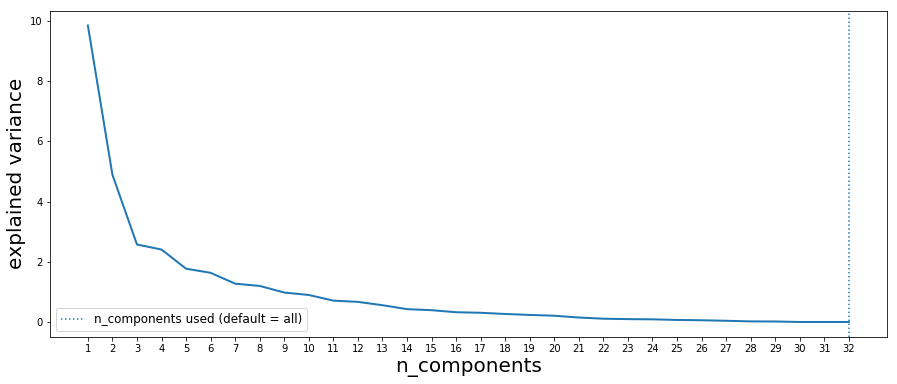

In [167]:
## Plot the PCA spectrum
fig, ax = plt.subplots(1,1, figsize=(15,6))
ax.plot(clf.named_steps['PCA'].explained_variance_, 
         linewidth=2)
plt.axvline(clf.named_steps['PCA'].n_components_-1,
            linestyle=':', label='n_components used (default = all)')
xax_labels = [str(item+1) for item in np.arange(clf.named_steps['PCA'].n_components_)]
ax.set_xticks(range(len(xax_labels)))
ax.set_xticklabels(xax_labels)
plt.axis('tight')
plt.xlabel('n_components', fontsize=20)
plt.ylabel('explained variance', fontsize=20)
plt.legend(prop=dict(size=12))
plt.show()

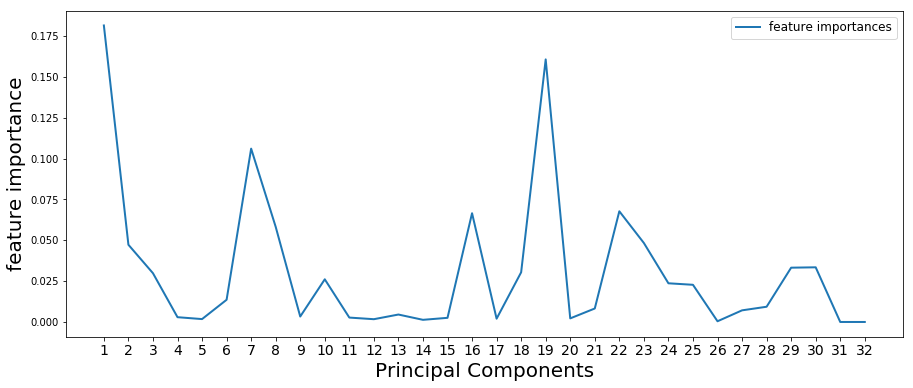

In [168]:
## feature importances
fig, ax = plt.subplots(1,1,figsize=(15,6))
ax.plot(clf.named_steps['clf'].feature_importances_, 
        linewidth=2, 
        label='feature importances')
xax_labels = [str(item+1) for item in np.arange(clf.named_steps['PCA'].n_components_)]
ax.set_xticks(range(len(xax_labels)))
ax.set_xticklabels(xax_labels, fontsize=14)
# ax.set_xticklabels(xax_labels, rotation='vertical', fontsize=14)
plt.axis('tight')
plt.xlabel('Principal Components', fontsize=20)
plt.ylabel('feature importance',  fontsize=20)
plt.legend(prop=dict(size=12))
plt.show()

In [195]:
InitializeDatas(add_dummies=True, make_upsampled=True)
## Gradient Boosting Classifier
estimators = [('Scaler', StandardScaler()),
              ('PCA', PCA(random_state=42)),
              ('clf', GradientBoostingClassifier(random_state=42))] 
clf = Pipeline(estimators) 
# clf.fit(X_train, y_train) # imbalanced training data
clf.fit(Xup_train, yup_train) # upsampled training data
preds = clf.predict(X_test)
grid_params = dict(
                   Scaler__with_mean=[True, False],
                   Scaler__with_std=[True, False],
                   PCA__n_components=[1,2,3,4,7,11,14],
                   clf__learning_rate=[.01, .05, .1],
                   clf__max_depth=[1,3,5,7]#,
#                    clf__max_features=[1,5,10]
                    )
# clf_gs = GridSearchCV(clf, grid_params, scoring=None)
# clf_gs.fit(X_train, y_train) # imbalanced training data
# clf_gs.fit(Xup_train, yup_train) # upsampled training data
# gs_preds = clf_gs.predict(X_test)
ScoreMe("gradient boost",y_test, preds)
# ScoreMe("gradient boost _ gsBestEst",y_test, gs_preds)
# clf_gs.best_params_

gradient boost: accuracy report
The accuracy is 0.9318181818181818
The recall is 0.75
The precision is 0.6
[[38  2]
 [ 1  3]]


In [176]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
gradboost_score_predummy = """
scoring == roc_auc
gradient boost: accuracy report
The accuracy is 0.8863636363636364
The recall is 0.2
The precision is 0.5
[[38  1]
 [ 4  1]]
gradient boost _ gsBestEst: accuracy report
The accuracy is 0.9090909090909091
The recall is 0.2
The precision is 1.0
[[39  0]
 [ 4  1]]
 """
gradboost_score_withdummy_Scaler_PCA = """
scoring == recall
gradient boost: accuracy report
The accuracy is 0.9090909090909091
The recall is 0.25
The precision is 0.5
[[39  1]
 [ 3  1]]
gradient boost _ gsBestEst: accuracy report
The accuracy is 0.9090909090909091
The recall is 0.25
The precision is 0.5
[[39  1]
 [ 3  1]]
 """
gradboost_score_predummy_withScaler_PCA = """
scoring == recall
gradient boost: accuracy report
The accuracy is 0.9090909090909091
The recall is 0.25
The precision is 0.5
[[39  1]
 [ 3  1]]
gradient boost _ gsBestEst: accuracy report
The accuracy is 0.9090909090909091
The recall is 0.25
The precision is 0.5
[[39  1]
 [ 3  1]]
 """

# Logistic Regression

In [4]:
InitializeDatas(add_dummies=False, make_upsampled=True)
## Logistic Regression
estimators = [('Scaler', StandardScaler()),
              ('PCA', PCA(random_state=RANDOM_STATE)),
              ('clf', LogisticRegression(random_state=RANDOM_STATE))] 
clf = Pipeline(estimators) 
# clf.fit(X_train, y_train) # imbalanced training data
clf.fit(Xup_train, yup_train) # upsampled training data
preds = clf.predict(X_test)
## grid search with pipeline
grid_params = dict(
                   Scaler__with_mean=[True, False],
                   Scaler__with_std=[True, False],
                   PCA__n_components=[1,2,3,4,7,11,14],
                   clf__C=[0.001,0.01,0.1,1,10,100],
                   clf__solver=["newton-cg", "liblinear", "sag", "saga"])
clf_gs = GridSearchCV(clf, grid_params, scoring='roc_auc')
# clf_gs.fit(X_train, y_train) # imbalanced training data
clf_gs.fit(Xup_train, yup_train) # upsampled training data
gs_preds = clf_gs.predict(X_test)
ScoreMe("logistic regression", y_test, preds)
ScoreMe("logistic regression _ gsBestEst",y_test, gs_preds) 
clf_gs.best_params_

/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-pa

/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-pa

/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-pa

/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packag

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm

/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The lin

/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iteration

/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not conve

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not conve

/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not conve

/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not conve

/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not 

/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did n

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not 

/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not conve

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not conve

/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-

/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packag

/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site

logistic regression: accuracy report
The accuracy is 0.7727272727272727
The recall is 0.75
The precision is 0.25
[[31  9]
 [ 1  3]]
logistic regression _ gsBestEst: accuracy report
The accuracy is 0.8409090909090909
The recall is 0.75
The precision is 0.3333333333333333
[[34  6]
 [ 1  3]]


/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did n

{'PCA__n_components': 11,
 'Scaler__with_mean': True,
 'Scaler__with_std': True,
 'clf__C': 100,
 'clf__solver': 'newton-cg'}

In [ ]:
LogReg_score_predummy = """
scoring == recall
logistic regression: accuracy report
The accuracy is 0.8409090909090909
The recall is 0.4
The precision is 0.3333333333333333
[[35  4]
 [ 3  2]]
logistic regression _ gsBestEst: accuracy report
The accuracy is 0.8181818181818182
The recall is 0.4
The precision is 0.2857142857142857
[[34  5]
 [ 3  2]]
"""
LogReg_score_withdummy_Scaler_PCA = """
scoring == recall
logistic regression: accuracy report
The accuracy is 0.9090909090909091
The recall is 0.0
The precision is 0.0
[[40  0]
 [ 4  0]]
logistic regression _ gsBestEst: accuracy report
The accuracy is 0.9090909090909091
The recall is 0.25
The precision is 0.5
[[39  1]
 [ 3  1]]
 """
LogReg_score_predummy_withScaler_PCA = """
scoring == recall
logistic regression: accuracy report
The accuracy is 0.8636363636363636
The recall is 0.25
The precision is 0.25
[[37  3]
 [ 3  1]]
logistic regression _ gsBestEst: accuracy report
The accuracy is 0.9318181818181818
The recall is 0.25
The precision is 1.0
[[40  0]
 [ 3  1]]
 """
LogReg_score_predummy_withScaler_PCA = """
scoring == roc_auc
logistic regression _ gsBestEst: accuracy report
The accuracy is 0.8863636363636364
The recall is 0.5
The precision is 0.4
[[37  3]
 [ 2  2]]
 """

# Support Vectors --crashes

In [ ]:
# ## Support Vectors Classifier
# estimators = [('Scaler', StandardScaler()),
#               ('PCA', PCA()),
#               ('clf', SVC())] 
# clf = Pipeline(estimators) 
# clf.fit(X_train, y_train) # imbalanced training data
# clf.fit(Xup_train, yup_train) # upsampled training data
# preds = clf.predict(X_test)
# # ## grid search with pipeline
# grid_params = dict(Scaler__with_mean=[True, False],
#                    Scaler__with_std=[True, False],
#                    clf__kernel=['rbf', 'poly', 'sigmoid'], #works
#                    clf__C=[0.001, 0.01, 0.1, 1, 5, 10])
# clf_gs = GridSearchCV(clf, grid_params, scoring='recall') #'scoring = none' > recall, f1, precision, and roc_auc doesnt work
# clf_gs.fit(X_train, y_train) # imbalanced training data
# clf_gs.fit(Xup_train, yup_train) # upsampled training data
# gs_preds = clf_gs.predict(X_test)
# ScoreMe("Support Vectors", y_test, preds)
# ScoreMe("Support Vectors _ gsBestEst",y_test, gs_preds)
# clf_gs.best_params_

In [ ]:
svc_score_predummy = """
scoring == None..built in...accuracy_score
Support Vectors: accuracy report
The accuracy is 0.8863636363636364
The recall is 0.0
The precision is 0.0
[[39  0]
 [ 5  0]]
Support Vectors _ gsBestEst: accuracy report
The accuracy is 0.8863636363636364
The recall is 0.0
The precision is 0.0
[[39  0]
 [ 5  0]]
"""
SVC_score_withdummy_Scaler_PCA = """
scoring == recall
Support Vectors: accuracy report
The accuracy is 0.9090909090909091
The recall is 0.0
The precision is 0.0
[[40  0]
 [ 4  0]]
Support Vectors _ gsBestEst: accuracy report
The accuracy is 0.8863636363636364
The recall is 0.25
The precision is 0.3333333333333333
[[38  2]
 [ 3  1]]
 """
SVC_score_predummy_withScaler_PCA = """
scoring == recall
Support Vectors: accuracy report
The accuracy is 0.9090909090909091
The recall is 0.0
The precision is 0.0
[[40  0]
 [ 4  0]]
Support Vectors _ gsBestEst: accuracy report
The accuracy is 0.6818181818181818
The recall is 0.5
The precision is 0.14285714285714285
[[28 12]
 [ 2  2]]
 """

# Random Forest

In [ ]:
# ###best forest
# ## Random Forest Classifier
# estimators = [('Scaler', MinMaxScaler()),
#               ('PCA', PCA(random_state=RANDOM_STATE)),
#               ('clf', RandomForestClassifier(random_state=RANDOM_STATE))] 
# clf = Pipeline(estimators) 
# clf.set_params(
#                PCA__n_components=7,
#                clf__bootstrap=False,
#                clf__criterion='entropy', 
#                clf__max_depth=None,
#                clf__min_samples_leaf=1,
#                clf__min_samples_split=2
#                )
# clf.fit(Xup_train, yup_train) # upsampled training data
# preds = clf.predict(X_test)
# ScoreMe("Random Forest", y_test, preds)
# clf.__init__

In [4]:
InitializeDatas(add_dummies=False, make_upsampled=True)

## Random Forest Classifier
estimators = [('Scaler', MinMaxScaler()),
              ('PCA', PCA(random_state=RANDOM_STATE)),
              ('clf', RandomForestClassifier(random_state=RANDOM_STATE))] 
clf = Pipeline(estimators) 
# clf.fit(X_train, y_train) # imbalanced training data
clf.fit(Xup_train, yup_train) # upsampled training data
preds = clf.predict(X_test)
## grid search with pipeline
grid_params = dict(
#                    Scaler__with_mean=[True, False],
#                    Scaler__with_std=[True, False],
                   PCA__n_components=[1,2,3,4,7,11,14],
                   clf__max_depth=[3, None],
#                    clf__max_features = [1, 3, 10],
                   clf__min_samples_split = [2, 3, 10],
                   clf__min_samples_leaf= [1, 3, 10],
                   clf__bootstrap=[True, False],
                   clf__criterion = ["gini", "entropy"])
clf_gs = GridSearchCV(clf, grid_params, scoring='precision')
# clf_gs.fit(X_train, y_train) # imbalanced training data
clf_gs.fit(Xup_train, yup_train) # upsampled training data
gs_preds = clf_gs.predict(X_test)
ScoreMe("Random Forest", y_test, preds)
ScoreMe("Random Forest _ gsBestEst",y_test, gs_preds)
print("best params", clf_gs.best_params_)

Random Forest: accuracy report
The accuracy is 0.8863636363636364
The recall is 0.0
The precision is 0.0
[[39  1]
 [ 4  0]]
Random Forest _ gsBestEst: accuracy report
The accuracy is 0.9318181818181818
The recall is 0.5
The precision is 0.6666666666666666
[[39  1]
 [ 2  2]]
best params {'PCA__n_components': 7, 'clf__bootstrap': False, 'clf__criterion': 'entropy', 'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}


In [ ]:
RandomForest_score_predummy = """
scoring == f1
Random Forest: accuracy report
The accuracy is 0.8863636363636364
The recall is 0.2
The precision is 0.5
[[38  1]
 [ 4  1]]
Random Forest _ gsBestEst: accuracy report
The accuracy is 0.8863636363636364
The recall is 0.2
The precision is 0.5
[[38  1]
 [ 4  1]]
"""
RandomForest_score_withdummy = """
scoring == recall
Random Forest: accuracy report
The accuracy is 0.9090909090909091
The recall is 0.0
The precision is 0.0
[[40  1]
 [ 3  0]]
Random Forest _ gsBestEst: accuracy report
The accuracy is 0.9318181818181818
The recall is 0.3333333333333333
The precision is 0.5
[[40  1]
 [ 2  1]]
"""
RandomForest_score_withdummy_Scaler_PCA = """
scoring == recall
Random Forest: accuracy report
The accuracy is 0.8863636363636364
The recall is 0.0
The precision is 0.0
[[39  1]
 [ 4  0]]
Random Forest _ gsBestEst: accuracy report
The accuracy is 0.9090909090909091
The recall is 0.0
The precision is 0.0
[[40  0]
 [ 4  0]]
 """
RandomForest_score_predummy_withScaler_PCA = """
scoring == recall
Random Forest: accuracy report
The accuracy is 0.8863636363636364
The recall is 0.25
The precision is 0.3333333333333333
[[38  2]
 [ 3  1]]
Random Forest _ gsBestEst: accuracy report
The accuracy is 0.8636363636363636
The recall is 0.25
The precision is 0.25
[[37  3]
 [ 3  1]]
 """

# Gaussian Naive Bayes

In [194]:
InitializeDatas(add_dummies=True, make_upsampled=False)
## Gaussian Naive Nayes
clf = GaussianNB()
estimators = [('Scaler', StandardScaler()),
              ('PCA', PCA(random_state=RANDOM_STATE)),
              ('clf', GaussianNB())] 
clf = Pipeline(estimators) 
clf.fit(X_train, y_train) # imbalanced training data
# clf.fit(Xup_train, yup_train) # upsampled training data
preds = clf.predict(X_test)
## grid search with pipeline
grid_params = dict(
                   Scaler__with_mean=[True, False],
                   Scaler__with_std=[True, False],
                   PCA__n_components=[1,2,3,4,7,11,14]
                    )
# clf_gs = GridSearchCV(clf, grid_params, scoring=None)
# clf_gs.fit(X_train, y_train) # imbalanced training data
# clf_gs.fit(Xup_train, yup_train) # upsampled training data
# preds = clf.predict(X_test)
# gs_preds = clf_gs.predict(X_test)
ScoreMe("Gaussian NB", y_test, preds)
# ScoreMe("Gaussian NB _ gsBestEst",y_test, gs_preds)
# print("best params", clf_gs.best_params_)

Gaussian NB: accuracy report
The accuracy is 0.8863636363636364
The recall is 0.5
The precision is 0.4
[[37  3]
 [ 2  2]]


In [ ]:
GaussNB_score_predummy = """
scoring == none
Gaussian NB: accuracy report
The accuracy is 0.8863636363636364
The recall is 0.4
The precision is 0.5
[[37  2]
 [ 3  2]]
"""
GaussNB_score_withdummy = """
scoring == none
Gaussian NB: accuracy report
The accuracy is 0.22727272727272727
The recall is 1.0
The precision is 0.08108108108108109
[[ 7 34]
 [ 0  3]]
"""
GaussNB_score_withdummy_Scaler_PCA = """
scoring == none
Gaussian NB: accuracy report
The accuracy is 0.8636363636363636
The recall is 0.5
The precision is 0.3333333333333333
[[36  4]
 [ 2  2]]
 """
GaussNB_score_predummy_withScaler_PCA = """
scoring == none
Gaussian NB: accuracy report
The accuracy is 0.8636363636363636
The recall is 0.5
The precision is 0.3333333333333333
[[36  4]
 [ 2  2]]
 """

# K Neighbors

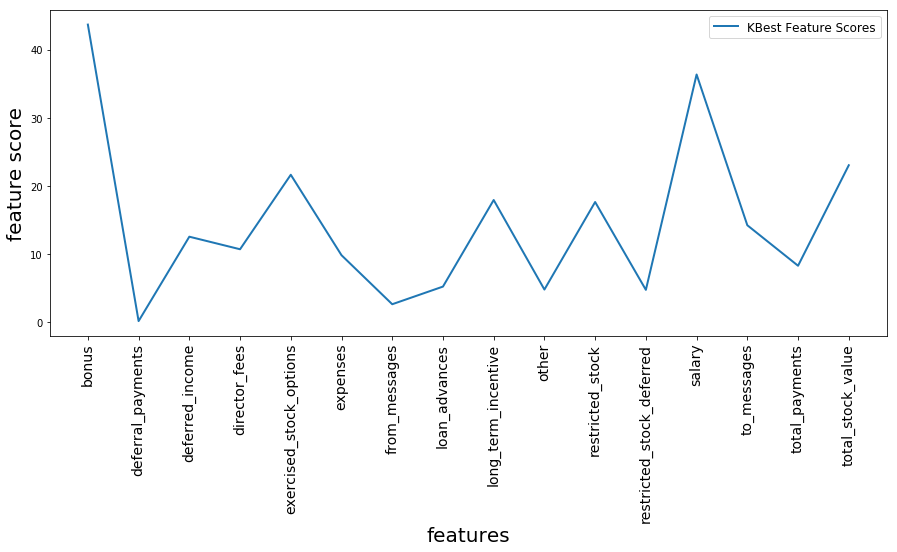

In [278]:
## feature scores
fig, ax = plt.subplots(1,1,figsize=(15,6))
ax.plot(clf.named_steps['KBest'].scores_, 
        linewidth=2, 
        label='KBest Feature Scores')
xax_labels = list(Xup_train.columns)
ax.set_xticks(range(len(xax_labels)))
ax.set_xticklabels(xax_labels, rotation='vertical', fontsize=14)
plt.axis('tight')
plt.xlabel('features', fontsize=20)
plt.ylabel('feature score',  fontsize=20)
plt.legend(prop=dict(size=12))
plt.show()

# """
# Using SelectKBest, gridSearch chooses 4 components as the best option. 
# The best estimator (using 4 components) scores worse than the best estimator
# without SelectKBest. Because of this, SelectKBest detracts from the model, 
# so I won't use it here.

# That being said, it is still interesting to see which features are most useful.
# The top four features, listed in descending order of importance, are: Bonus,
# exercised stock options, salary, total_stock value. Notably not useful are count of
# to and from email messages, deferral payments, restricted stock deferred, and long term incentive.
# That last one is not surprising given the clear short-term focus of the fraudsters. 
# """

In [314]:
InitializeDatas(add_dummies=False, make_upsampled=True)
## K Neighbors Classifier
estimators = [
              ('Scaler', MinMaxScaler()),
              ('KBest', SelectKBest()),
#               ('PCA', PCA(random_state=RANDOM_STATE)),
              ('clf', KNeighborsClassifier())] 
clf = Pipeline(estimators) 
# clf.fit(X_train, y_train) # imbalanced training data
clf.fit(Xup_train, yup_train) # upsampled training data
preds = clf.predict(X_test)
## grid search with pipeline
k_range = list(range(1, 31))
grid_params = dict(
#                    PCA__n_components=[1,2,3,4,7,11,14], #makes it way worse
                   KBest__k=[4,8,14],
                   clf__n_neighbors=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
                                     11, 12, 13, 14, 15, 16, 17, 18,
                                     19, 20, 21, 22, 23, 24, 25, 26, 
                                     27, 28, 29, 30],
                   clf__weights=['uniform','distance'],
                   clf__algorithm=['auto', 'brute', 'ball_tree', 'kd_tree'],
                   clf__metric=['minkowski','euclidean','manhattan'])
clf_gs = GridSearchCV(clf, grid_params, scoring='recall')
# clf_gs.fit(X_train, y_train) # imbalanced training data
clf_gs.fit(Xup_train, yup_train) # upsampled training data
gs_preds = clf_gs.predict(X_test)
ScoreMe("K Neighbors Classifier", y_test, preds)
ScoreMe("K Neighbors Classifier _ gsBestEst",y_test, gs_preds)
# clf_gs.best_params_

K Neighbors Classifier: accuracy report
The accuracy is 0.7727272727272727
The recall is 1.0
The precision is 0.2857142857142857
[[30 10]
 [ 0  4]]
K Neighbors Classifier _ gsBestEst: accuracy report
The accuracy is 0.8181818181818182
The recall is 0.25
The precision is 0.16666666666666666
[[35  5]
 [ 3  1]]


In [ ]:
KNN_score_withdummy_Scaler_PCA = """
scoring == recall
K Neighbors Classifier: accuracy report
The accuracy is 0.8863636363636364
The recall is 0.0
The precision is 0.0
[[39  1]
 [ 4  0]]
K Neighbors Classifier _ gsBestEst: accuracy report
The accuracy is 0.8409090909090909
The recall is 0.0
The precision is 0.0
[[37  3]
 [ 4  0]]
"""
KNN_score_predummy_withScaler_PCA = """
scoring == recall
K Neighbors Classifier: accuracy report
The accuracy is 0.8863636363636364
The recall is 0.0
The precision is 0.0
[[39  1]
 [ 4  0]]
K Neighbors Classifier _ gsBestEst: accuracy report
The accuracy is 0.8409090909090909
The recall is 0.0
The precision is 0.0
[[37  3]
 [ 4  0]]
"""
KNN_score_predummy_withScaler_PCA AND upsampled classes -- no GridSearch= """
K Neighbors Classifier: accuracy report
The accuracy is 0.8181818181818182
The recall is 0.75
The precision is 0.3
[[33  7]
 [ 1  3]]
 """
KNN_score_predummy_with MINMAXScaler_PCA AND upsampled classes """
K Neighbors Classifier: accuracy report
The accuracy is 0.7727272727272727
The recall is 1.0
The precision is 0.2857142857142857
[[30 10]
 [ 0  4]]
K Neighbors Classifier _ gsBestEst: accuracy report
The accuracy is 0.9090909090909091
The recall is 0.75
The precision is 0.5
[[37  3]
 [ 1  3]]
 
"""

# Best Scores
```
KNN_score_predummy_with MINMAXScaler_PCA AND upsampled classes """

K Neighbors Classifier: accuracy report
The accuracy is 0.7727272727272727
The recall is 1.0
The precision is 0.2857142857142857
[[30 10]
 [ 0  4]]
K Neighbors Classifier _ gsBestEst: accuracy report 
```
#### The accuracy is 0.9090909090909091
#### The recall is 0.75
#### The precision is 0.5
```
[[37  3]
 [ 1  3]]
 
"""
```

```
LogReg_score_predummy_withScaler_PCA = """
scoring == roc_auc
logistic regression _ gsBestEst: accuracy report
The accuracy is 0.8863636363636364
The recall is 0.5
The precision is 0.4
[[37  3]
 [ 2  2]]


GaussNB_score_predummy_withScaler_PCA = """
scoring == none
Gaussian NB: accuracy report 
The accuracy is 0.8636363636363636
The recall is 0.5
The precision is 0.3333333333333333
[[36  4]
 [ 2  2]]
 ```

In [ ]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

#convert df back to dict
my_dataset = df.to_dict(orient='index')
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

dump_classifier_and_data(clf, my_dataset, features_list)

### Resources

* https://elitedatascience.com/imbalanced-classes 

* http://scikit-learn.org/

* https://www.quora.com/What-is-the-difference-between-principal-component-analysis-PCA-and-feature-selection-in-machine-learning-Is-PCA-a-means-of-feature-selection

* https://towardsdatascience.com/dimensionality-reduction-does-pca-really-improve-classification-outcome-6e9ba21f0a32

* https://datascience.stackexchange.com/questions/16062/is-feature-selection-necessary

* http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html

* https://stats.stackexchange.com/questions/244507/what-algorithms-need-feature-scaling-beside-from-svm/252618

* http://www.dataschool.io/comparing-supervised-learning-algorithms/

* https://www.kaggle.com/joparga3/2-tuning-parameters-for-logistic-regression

* https://medium.com/@aneesha/svm-parameter-tuning-in-scikit-learn-using-gridsearchcv-2413c02125a0

* https://gist.github.com/HackerEarthBlog/a84a446810494d4ca0c178e864ab2391

* https://stackoverflow.com/questions/41241572/python-pandas-generate-dummy-variable-from-numeric-variable-according-to-a-thre

* https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7

In [ ]:
print("AUROC: {}".format(round(roc_auc_score(y_test, (1-lr_preds)), 2)))
print("f1 score: {}".format(round(f1_score(y_test, lr_preds), 3)))